# Machine learning project - esto deberia ir fuera cuando limpie

1. Data adquisition: import data, first view of data and 'NaN' cleanning
2. Data check: cleaning NaN, visualize data and check outliers
2. define features 
3. PCA chose features
4. try clasifiers and check scores
5. chose one clasifier and explain result

# 1. DATA ADQUISITION  - esto viene de 1 , deberia meterlo en un py y hacerlo venir cada vez en cada fichero. el bla bla va fuera cuando termine

First thing to do is to create a dictionary with the features we need and we check the keys and the values of one key.

In [3]:
import os 

os.chdir(r'C:\Users\sanchez_sanc\Desktop\data_analyst\Curso\4_Machine_learning\Curso_PY_3\tools') 

import sys
import pickle
from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data

#import warnings
#warnings.filterwarnings('ignore')

### Task 1: Select what features we'll use (The first feature must be "poi")
features_list = ['poi','salary', 'deferral_payments', 'total_payments', 'loan_advances', 'bonus',
                 'restricted_stock_deferred', 'deferred_income', 'total_stock_value', 'expenses',
                 'exercised_stock_options', 'other', 'long_term_incentive', 'restricted_stock', 
                 'director_fees']

### Loading the dictionary containing the dataset
os.chdir(r'C:\Users\sanchez_sanc\Desktop\data_analyst\Curso\4_Machine_learning\Curso_PY_3\final_project') # the directory where you want to go

sys.path.append("../Curso_PY_3/final_project/")
data_dict = pickle.load(open("final_project_dataset.pkl", "rb"))

import pandas as pd
data_df = pd.DataFrame.from_dict(data_dict, orient='index')


# 2. Data check: cross check figures, clean NaN, identify outliers and clean data set, visualize data

Lets make a first old school check to ensure that total payment and total stock value are the sum of the different payments and stock features respectively

In [96]:
# Define what is payment data 
payment_data=['salary', 'deferral_payments', 'loan_advances', 'bonus',
                 'deferred_income',  'expenses', 'other', 'long_term_incentive',
                 'director_fees','total_payments']

# Create data frame of payment with payment data for total payment not NaN. Replace NaN by 0.0. 

payms = data_df.loc[:, 'total_payments']  != 'NaN'
payms_df = data_df.loc[payms]

payms = payms_df.loc[ :,('salary', 'deferral_payments', 'loan_advances', 'bonus',
                 'deferred_income',  'expenses', 'other', 'long_term_incentive',
                 'director_fees',  'total_payments')]

payms = payms.replace('NaN', 0.0)

payms_df = payms_df.replace('NaN', 0.0)

t_pay_wrong = (payms [payms [payment_data[:-1]].sum(axis='columns') != payms_df ['total_payments']])

t_pay_wrong 

,salary,deferral_payments,loan_advances,bonus,deferred_income,expenses,other,long_term_incentive,director_fees,total_payments
BELFER ROBERT,0.0,-102500.0,0.0,0.0,0.0,0.0,0.0,0.0,3285.0,102500
BHATNAGAR SANJAY,0.0,0.0,0.0,0.0,0.0,0.0,137864.0,0.0,137864.0,15456290


There are two lines where the sum of payments are not equal to the total payments

In [97]:
# Define what is stock data
stock_data=['restricted_stock_deferred', 'exercised_stock_options', 'restricted_stock', 'total_stock_value' ]

# Create data frame of stocks with stock data for total stock not NaN. Replace NaN by 0.0. 

stocks = data_df.loc[:, 'total_stock_value']  != 'NaN'
stocks_df = data_df.loc[stocks]

stocks = stocks_df.loc[ :,('restricted_stock_deferred','exercised_stock_options', 
                           'restricted_stock', 'total_stock_value')]

stocks = stocks.replace('NaN', 0.0)

stocks_df = stocks_df.replace('NaN', 0.0)

t_stock_wrong = (stocks [stocks [stock_data[:-1]].sum(axis='columns') != stocks_df ['total_stock_value']])

t_stock_wrong 

,restricted_stock_deferred,exercised_stock_options,restricted_stock,total_stock_value
BELFER ROBERT,44093.0,3285.0,0.0,-44093


There is only one register where the sum of stocks informations are not equal to the total stock value.
And that is for the same person, Belfer Robert.
Lets go to the pdf with the insider payment to check where the issue comes from.

In [69]:
data_dict['BELFER ROBERT']

In fact, none of the informations about payments or stock are right foer R. Belfer.
But who is R. Belfer and what was his role in the colapse?
Belfer was chairman of Belco Petroleum Corp. that was merged into one of the predecessors of Enron Corp, the Omaha, Nebraska-based InterNorth, Inc., and the Belfer family received a sizeable equity stake in the transaction, eventually becoming Enron's largest shareholder. Belfer served the board of directors of Enron and was estimated to have held over 16 million Enron shares as of August, 2000. However, he was reported to be reticent on the board and was not involved in the operations of the company. He resigned from the board in June, 2002.

We have two options, we delete his register from the data set or we correct them
As no information related to mails is avalaible and the financial data are not relevant neither for payment or stock, the best option will be delete this register

In [70]:
data_dict['BHATNAGAR SANJAY']

In fact, none of the informations about payments are right, and we see that stock options neither.
But who is S. Bhatnagar and what was his role in the colapse?
Mr. Bhatnagar has served as the chairman and CEO of Enron South Asia where his responsibilities included developing and financing energy infrastructure. He was the lead developer of the 2,184 megawatt Dabhol Power project in India, which began commercial operations in May 1999.

We have two options, we delete his register from the data set or we correct them
The information related to mails is that he send 29 mails and only 1 to a poi. 

Lets analyse now the total payments and the total stock value to detect outliers.
Firts lets remove the ones identified until now: "TOTAL", "THE TRAVEL AGENCY IN THE PARK",'BELFER ROBERT' and 'BHATNAGAR SANJAY'.

In [68]:
clean_data_dict = pickle.load(open("final_project_dataset.pkl", "rb"))
clean_data_dict.pop("TOTAL", 0)
clean_data_dict.pop("THE TRAVEL AGENCY IN THE PARK", 0)
clean_data_dict.pop('BELFER ROBERT', 0)
clean_data_dict.pop('BHATNAGAR SANJAY', 0)

data_c_df = pd.DataFrame.from_dict(clean_data_dict, orient='index')
data_c_df= data_c_df.replace('NaN', 0.0)

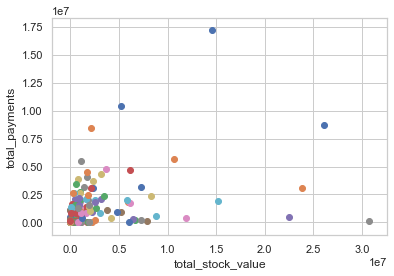

In [82]:
# 2D charts
import matplotlib.pyplot as plt

### the input features we want to use 

feature_1 = "total_stock_value"
feature_2 = "total_payments"
poi  = "poi"
features_list = [poi, feature_1, feature_2]
data = featureFormat(clean_data_dict, features_list ) # clan_data_dict se hace mas tarde aqui es data_dict
poi, finance_features = targetFeatureSplit( data )

for f1, f2 in finance_features:
    plt.scatter( f1, f2, )
    plt.xlabel(feature_1)
    plt.ylabel(feature_2)
plt.show()

We have one outlier, lets see who is this rich man

In [75]:
tt_paym = data_c_df.sort_values('total_payments',ascending=False)
tt_paym.head(2)

,salary,to_messages,deferral_payments,total_payments,loan_advances,bonus,email_address,restricted_stock_deferred,deferred_income,total_stock_value,...,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,poi,long_term_incentive,shared_receipt_with_poi,restricted_stock,director_fees
LAY KENNETH L,1072321.0,4273.0,202911.0,103559793.0,81525000.0,7000000.0,kenneth.lay@enron.com,0.0,-300000.0,49110078.0,...,123.0,34348384.0,36.0,10359729.0,16.0,True,3600000.0,2411.0,14761694.0,0.0
FREVERT MARK A,1060932.0,3275.0,6426990.0,17252530.0,2000000.0,2000000.0,mark.frevert@enron.com,0.0,-3367011.0,14622185.0,...,242.0,10433518.0,21.0,7427621.0,6.0,False,1617011.0,2979.0,4188667.0,0.0


In [76]:
tt_paym = data_c_df.sort_values('total_stock_value',ascending=False)
tt_paym.head(2)

,salary,to_messages,deferral_payments,total_payments,loan_advances,bonus,email_address,restricted_stock_deferred,deferred_income,total_stock_value,...,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,poi,long_term_incentive,shared_receipt_with_poi,restricted_stock,director_fees
LAY KENNETH L,1072321.0,4273.0,202911.0,103559793.0,81525000.0,7000000.0,kenneth.lay@enron.com,0.0,-300000.0,49110078.0,...,123.0,34348384.0,36.0,10359729.0,16.0,True,3600000.0,2411.0,14761694.0,0.0
HIRKO JOSEPH,0.0,0.0,10259.0,91093.0,0.0,0.0,joe.hirko@enron.com,0.0,0.0,30766064.0,...,0.0,30766064.0,0.0,2856.0,0.0,True,0.0,0.0,0.0,0.0


Lay is an outlier but not to be removed from our data set.
We are going to analyse again the salary and the stock withou Lay to detect any outlier or mistake in the data

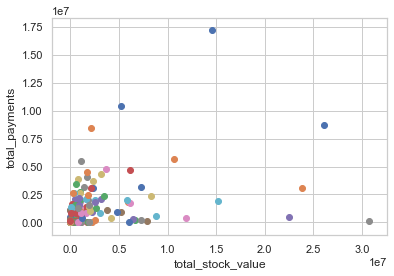

In [84]:
# 2D charts
import matplotlib.pyplot as plt

# remove Lay Kenneth
clean_data_dict.pop("LAY KENNETH L", 0)

### the input features we want to use 

feature_1 = "total_stock_value"
feature_2 = "total_payments"
poi  = "poi"
features_list = [poi, feature_1, feature_2]
data = featureFormat(clean_data_dict, features_list )
poi, finance_features = targetFeatureSplit( data )

for f1, f2 in finance_features:
    plt.scatter( f1, f2 )
    plt.xlabel(feature_1)
    plt.ylabel(feature_2)
plt.show()

There are people with salary 0 but payments and people with payments bigger than salary but not 
Seams not outlier in payment or stock value

Lets see if salary is the main source of payment for the people in the data set

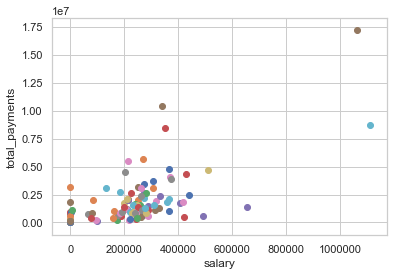

In [85]:
### the input features we want to use 
feature_1 = "salary"
feature_2 = "total_payments"
poi  = "poi"
features_list = [poi, feature_1, feature_2]
data = featureFormat(clean_data_dict, features_list )
poi, finance_features = targetFeatureSplit( data )

for f1, f2 in finance_features:
    plt.scatter( f1, f2, )
    plt.xlabel(feature_1)
    plt.ylabel(feature_2)
plt.show()

There are some payments on top of salary and for some there are not salary but payments but does not seam any outlier 

Lets analyse now the mails exchange visualy to see if outliers including Lay

In [87]:
clean_data_dict = pickle.load(open("final_project_dataset.pkl", "rb"))
clean_data_dict.pop("TOTAL", 0)
clean_data_dict.pop("THE TRAVEL AGENCY IN THE PARK", 0)
clean_data_dict.pop('BELFER ROBERT', 0)
clean_data_dict.pop('BHATNAGAR SANJAY', 0)

data_c_df = pd.DataFrame.from_dict(clean_data_dict, orient='index')
data_c_df= data_c_df.replace('NaN', 0.0)

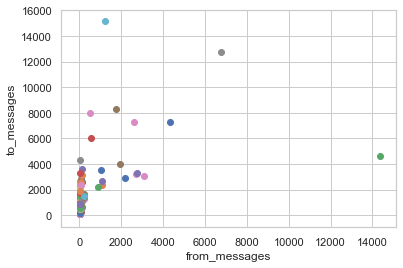

In [88]:
### the input features we want to use 

feature_1 = "from_messages"
feature_2 = "to_messages"
poi  = "poi"
features_list = [poi, feature_1, feature_2]
data = featureFormat(clean_data_dict, features_list )
poi, finance_features = targetFeatureSplit( data )

for f1, f2 in finance_features:
    plt.scatter( f1, f2 )
    plt.xlabel(feature_1)
    plt.ylabel(feature_2)
plt.show()

To messages and from messages have a max over 10 thousand message, I am curious to know who has send and got those level of messages

In [91]:
# Define what is email data
email_data=['email_address', 'from_messages', 'to_messages', 'shared_receipt_with_poi',
            'from_poi_to_this_person', 'from_this_person_to_poi'] 

# Create data frame of email with email data for the people that has email address (email address not 'NaN') 
# and replace NaN by 0.0  

emails = data_c_df.loc[:, 'email_address']  != 'NaN'
emails_c_df = data_c_df.loc[emails]

emails = emails_c_df.loc[ :,('email_address', 'from_messages', 'to_messages', 'shared_receipt_with_poi',
            'from_poi_to_this_person', 'from_this_person_to_poi')]

emails = emails.replace('NaN', 0.0)

#emails_df = emails_df.replace('NaN', 0.0)

by_from = emails.sort_values('from_messages',ascending=False)
by_from.head(15)

,email_address,from_messages,to_messages,shared_receipt_with_poi,from_poi_to_this_person,from_this_person_to_poi
KAMINSKI WINCENTY J,vince.kaminski@enron.com,14368.0,4607.0,583.0,41.0,171.0
KEAN STEVEN J,steven.kean@enron.com,6759.0,12754.0,3639.0,140.0,387.0
BECK SALLY W,sally.beck@enron.com,4343.0,7315.0,2639.0,144.0,386.0
DELAINEY DAVID W,david.delainey@enron.com,3069.0,3093.0,2097.0,66.0,609.0
MCCONNELL MICHAEL S,mike.mcconnell@enron.com,2742.0,3329.0,2189.0,92.0,194.0
SHANKMAN JEFFREY A,jeffrey.shankman@enron.com,2681.0,3221.0,1730.0,94.0,83.0
LAVORATO JOHN J,john.lavorato@enron.com,2585.0,7259.0,3962.0,528.0,411.0
ALLEN PHILLIP K,phillip.allen@enron.com,2195.0,2902.0,1407.0,47.0,65.0
HAEDICKE MARK E,mark.haedicke@enron.com,1941.0,4009.0,1847.0,180.0,61.0
KITCHEN LOUISE,louise.kitchen@enron.com,1728.0,8305.0,3669.0,251.0,194.0


In [99]:
by_from = emails.sort_values('to_messages',ascending=False)
by_from.head(15)

,email_address,from_messages,to_messages,shared_receipt_with_poi,from_poi_to_this_person,from_this_person_to_poi
SHAPIRO RICHARD S,richard.shapiro@enron.com,1215.0,15149.0,4527.0,74.0,65.0
KEAN STEVEN J,steven.kean@enron.com,6759.0,12754.0,3639.0,140.0,387.0
KITCHEN LOUISE,louise.kitchen@enron.com,1728.0,8305.0,3669.0,251.0,194.0
BELDEN TIMOTHY N,tim.belden@enron.com,484.0,7991.0,5521.0,228.0,108.0
BECK SALLY W,sally.beck@enron.com,4343.0,7315.0,2639.0,144.0,386.0
LAVORATO JOHN J,john.lavorato@enron.com,2585.0,7259.0,3962.0,528.0,411.0
WHALLEY LAWRENCE G,greg.whalley@enron.com,556.0,6019.0,3920.0,186.0,24.0
KAMINSKI WINCENTY J,vince.kaminski@enron.com,14368.0,4607.0,583.0,41.0,171.0
LAY KENNETH L,kenneth.lay@enron.com,36.0,4273.0,2411.0,123.0,16.0
HAEDICKE MARK E,mark.haedicke@enron.com,1941.0,4009.0,1847.0,180.0,61.0


In [72]:
data_dict['KAMINSKI WINCENTY J']

{'salary': 275101,
 'to_messages': 4607,
 'deferral_payments': 'NaN',
 'total_payments': 1086821,
 'loan_advances': 'NaN',
 'bonus': 400000,
 'email_address': 'vince.kaminski@enron.com',
 'restricted_stock_deferred': 'NaN',
 'deferred_income': 'NaN',
 'total_stock_value': 976037,
 'expenses': 83585,
 'from_poi_to_this_person': 41,
 'exercised_stock_options': 850010,
 'from_messages': 14368,
 'other': 4669,
 'from_this_person_to_poi': 171,
 'poi': False,
 'long_term_incentive': 323466,
 'shared_receipt_with_poi': 583,
 'restricted_stock': 126027,
 'director_fees': 'NaN'}

Seams that W. Kaminsky is a very prolific emails sender, but not a Poi neither big payments neither big stock values. Lets go to the web to discover who is this person
Vincent Julian Kaminski was born in Poland and worked as the Managing Director for Research at the failed energy trading corporation Enron until 2002. In this capacity he led a team of approximately fifty analysts who developed quantitative models to support energy trading. In the months preceding Enron’s bankruptcy Kaminski repeatedly raised strong objections to the financial practices of Enron’s Chief Financial Officer, Andrew Fastow, designed to fraudulently conceal the company’s burgeoning debt.
And we found in the net the origin of this amount of data: "Though much private data has been removed, browsing hundreds of e-mails in Kaminski’s “sent” folder, I found a home phone number, his wife’s name, and an unflattering opinion he held of a former colleague. I also got the sense that he had been long, long overdue for the promotion he received in 2000. At the time the e-mails were first released, Kaminski, the manager of about 50 employees at Enron, said he was most disturbed to see his back-and-forth communications about HR complaints and job candid­ate evaluations become public. A job candidate he once interviewed got upset after their release."
@ https://www.technologyreview.com/2013/07/02/177506/the-immortal-life-of-the-enron-e-mails/

Now the mistery reveal, I decide to remove this person from the data as could be misleading for the data analysis.

Lets investigate now Richard Shapiro and Steven Kean

In [86]:
data_dict['SHAPIRO RICHARD S']

{'salary': 269076,
 'to_messages': 15149,
 'deferral_payments': 'NaN',
 'total_payments': 1057548,
 'loan_advances': 'NaN',
 'bonus': 650000,
 'email_address': 'richard.shapiro@enron.com',
 'restricted_stock_deferred': 'NaN',
 'deferred_income': 'NaN',
 'total_stock_value': 987001,
 'expenses': 137767,
 'from_poi_to_this_person': 74,
 'exercised_stock_options': 607837,
 'from_messages': 1215,
 'other': 705,
 'from_this_person_to_poi': 65,
 'poi': False,
 'long_term_incentive': 'NaN',
 'shared_receipt_with_poi': 4527,
 'restricted_stock': 379164,
 'director_fees': 'NaN'}

Richard Shapiro: Vice President of Regulatory Affairs 
https://www.researchgate.net/figure/A-fraction-of-the-email-corpus-of-Richard-Shapiro-an-Enron-employee-represented-as-a_fig1_220515841

He is not consifered as Poi then I prefer to remove him from the data set.

Lets see Steven J. Kean

In [57]:
data_dict['KEAN STEVEN J']

{'salary': 404338,
 'to_messages': 12754,
 'deferral_payments': 'NaN',
 'total_payments': 1747522,
 'loan_advances': 'NaN',
 'bonus': 1000000,
 'email_address': 'steven.kean@enron.com',
 'restricted_stock_deferred': 'NaN',
 'deferred_income': 'NaN',
 'total_stock_value': 6153642,
 'expenses': 41953,
 'from_poi_to_this_person': 140,
 'exercised_stock_options': 2022048,
 'from_messages': 6759,
 'other': 1231,
 'from_this_person_to_poi': 387,
 'poi': False,
 'long_term_incentive': 300000,
 'shared_receipt_with_poi': 3639,
 'restricted_stock': 4131594,
 'director_fees': 'NaN'}

He is not poi, but aparently exchange a lot of emails with Poi 

In [104]:
by_from = emails.sort_values('from_this_person_to_poi',ascending=False)
by_from.head()

,email_address,from_messages,to_messages,shared_receipt_with_poi,from_poi_to_this_person,from_this_person_to_poi
DELAINEY DAVID W,david.delainey@enron.com,3069.0,3093.0,2097.0,66.0,609.0
LAVORATO JOHN J,john.lavorato@enron.com,2585.0,7259.0,3962.0,528.0,411.0
KEAN STEVEN J,steven.kean@enron.com,6759.0,12754.0,3639.0,140.0,387.0
BECK SALLY W,sally.beck@enron.com,4343.0,7315.0,2639.0,144.0,386.0
KITCHEN LOUISE,louise.kitchen@enron.com,1728.0,8305.0,3669.0,251.0,194.0


In fact, he si the 3rd that send the most mail to poi, lets investigate in the net.
Steven J. Kean, was Enron’s former senior Vice President of Government Affairs. 
There is a very interesting analysis about the mails of Mr. Kean at Enron data set @ 
https://www.researchgate.net/publication/327252947_Security_Threats_for_Big_Data_An_Empirical_Study
   
He is not considered as Poi then I prefer to remove him from the data set despite he is on the top people who send mails to Poi.

Then we have now some outliers to be traeted
Lets remove form the data set 'THE TRAVEL AGENCY IN THE PARK', 'TOTAL', 'BELFER ROBERT', 'BHATNAGAR SANJAY', 'KAMINSKI WINCENTY J', 'SHAPIRO RICHARD S' and 'KEAN STEVEN J'

In [104]:
clean_data_dict = pickle.load(open("final_project_dataset.pkl", "rb"))
clean_data_dict.pop("TOTAL", 0)
clean_data_dict.pop("THE TRAVEL AGENCY IN THE PARK", 0)
clean_data_dict.pop('BELFER ROBERT', 0)
clean_data_dict.pop('BHATNAGAR SANJAY', 0)
clean_data_dict.pop('KAMINSKI WINCENTY J', 0)
clean_data_dict.pop('SHAPIRO RICHARD S',0)
clean_data_dict.pop('KEAN STEVEN J', 0)
clean_data_dict.keys()

dict_keys(['METTS MARK', 'BAXTER JOHN C', 'ELLIOTT STEVEN', 'CORDES WILLIAM R', 'HANNON KEVIN P', 'MORDAUNT KRISTINA M', 'MEYER ROCKFORD G', 'MCMAHON JEFFREY', 'HAEDICKE MARK E', 'PIPER GREGORY F', 'HUMPHREY GENE E', 'NOLES JAMES L', 'BLACHMAN JEREMY M', 'SUNDE MARTIN', 'GIBBS DANA R', 'LOWRY CHARLES P', 'COLWELL WESLEY', 'MULLER MARK S', 'JACKSON CHARLENE R', 'WESTFAHL RICHARD K', 'WALTERS GARETH W', 'WALLS JR ROBERT H', 'KITCHEN LOUISE', 'CHAN RONNIE', 'SHANKMAN JEFFREY A', 'WODRASKA JOHN', 'BERGSIEKER RICHARD P', 'URQUHART JOHN A', 'BIBI PHILIPPE A', 'RIEKER PAULA H', 'WHALEY DAVID A', 'BECK SALLY W', 'HAUG DAVID L', 'ECHOLS JOHN B', 'MENDELSOHN JOHN', 'HICKERSON GARY J', 'CLINE KENNETH W', 'LEWIS RICHARD', 'HAYES ROBERT E', 'KOPPER MICHAEL J', 'LEFF DANIEL P', 'LAVORATO JOHN J', 'BERBERIAN DAVID', 'DETMERING TIMOTHY J', 'WAKEHAM JOHN', 'POWERS WILLIAM', 'GOLD JOSEPH', 'BANNANTINE JAMES M', 'DUNCAN JOHN H', 'SHERRIFF JOHN R', 'SHELBY REX', 'LEMAISTRE CHARLES', 'DEFFNER JOSEPH M', 'K

In [108]:
import pandas as pd
data_nord_df = pd.DataFrame.from_dict(clean_data_dict, orient='index')

data_df= data_nord_df.loc[ :,('salary', 'bonus', 'long_term_incentive',
                               'deferred_income','deferral_payments', 'loan_advances',
                               'other', 'expenses','director_fees',  'total_payments',
                               'exercised_stock_options', 'restricted_stock',
                               'restricted_stock_deferred', 'total_stock_value',
                               'from_messages', 'to_messages', 
                               'from_poi_to_this_person', 'from_this_person_to_poi',
                               'shared_receipt_with_poi','email_address', 'poi'
                          )]  

Lets see now the information regarding the different features

In [107]:
nan_summary = pd.DataFrame({'size':data_df.count(),
                         'no-nan':data_df.applymap(lambda x: pd.np.nan if x=='NaN' else x).count()},
                         index= data_df.columns)
nan_summary['no-nan-proportion'] = nan_summary['no-nan'] / nan_summary['size']
round(nan_summary,2)

,size,no-nan,no-nan-proportion
salary,139,91,0.65
bonus,139,78,0.56
long_term_incentive,139,63,0.45
deferred_income,139,48,0.35
deferral_payments,139,37,0.27
loan_advances,139,3,0.02
other,139,87,0.63
expenses,139,91,0.65
director_fees,139,14,0.10
total_payments,139,118,0.85


We see that we have some categories that provides low level of data, we should investigate if those should remains as features or not.
As seen during data adquisition, loan advances could be removed or integrate with another category in a new feature.
Perhaps we could create a compound feature with some of the payment / stock categories but that is part or another discussion, lets continue now with data checking and visualization.

Let see some statistic from the data to try to detect further anomalies

In [109]:
data_df= data_df.replace('NaN', 0.0)
round(data_df.describe(),0)

,salary,bonus,long_term_incentive,deferred_income,deferral_payments,loan_advances,other,expenses,director_fees,total_payments,exercised_stock_options,restricted_stock,restricted_stock_deferred,total_stock_value,from_messages,to_messages,from_poi_to_this_person,from_this_person_to_poi,shared_receipt_with_poi
count,139.0,139.0,139.0,139.0,139.0,139.0,139.0,139.0,139.0,139.0,139.0,139.0,139.0,139.0,139.0,139.0,139.0,139.0,139.0
mean,185293.0,685566.0,344593.0,-200650.0,230816.0,603777.0,304309.0,34754.0,9324.0,2197780.0,2106675.0,885158.0,-35455.0,2956378.0,216.0,1045.0,38.0,21.0,662.0
std,198186.0,1252093.0,697704.0,615750.0,766161.0,6915543.0,1150439.0,44896.0,29896.0,8932348.0,4875401.0,2009444.0,172589.0,6279718.0,659.0,1640.0,75.0,74.0,1014.0
min,0.0,0.0,0.0,-3504386.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1787380.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,-39798.0,0.0,0.0,0.0,0.0,0.0,87451.0,0.0,38276.0,0.0,254936.0,0.0,0.0,0.0,0.0,0.0
50%,210500.0,300000.0,0.0,0.0,0.0,0.0,891.0,18834.0,0.0,911453.0,601438.0,360528.0,0.0,955873.0,16.0,266.0,4.0,0.0,91.0
75%,267098.0,800000.0,375304.0,0.0,13422.0,0.0,150557.0,52688.0,0.0,1956978.0,1652647.0,775992.0,0.0,2307584.0,49.0,1504.0,40.0,12.0,887.0
max,1111258.0,8000000.0,5145434.0,0.0,6426990.0,81525000.0,10359729.0,228763.0,125034.0,103559793.0,34348384.0,14761694.0,0.0,49110078.0,4343.0,8305.0,528.0,609.0,5521.0
